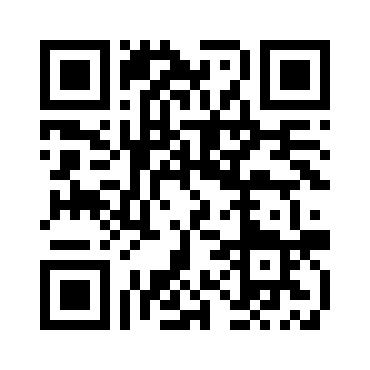

Encrypted data: WqTQp1+UNBSofucBHaml0v+Lyu4Ky4841Qh0guiNJzY=


In [7]:
import qrcode
import sqlite3
import pandas as pd
import polars as pl


conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

def get_table(table: str, conn = conn):
    """
    This function returns a polars DataFrame from the specified table in the database.
    """
    return pl.read_database(f'SELECT * FROM {table}', conn)

data = get_table('keys').to_pandas()
enc_key = data.loc[0, 'encryption_key']
enc_id = data.loc[0, 'encrypted_id']
unenc_id = data.loc[0, 'unencrypted_id']
# Generate the QR code
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

qr.add_data(enc_id)
qr.make(fit=True)

# Create and save the QR code image
img = qr.make_image(fill='black', back_color='white')
img.save("encrypted_qr_code.png")

# Optionally, show the image
img.show()

# The encrypted data (this is what is encoded in the QR code)
print("Encrypted data:", enc_id)

In [20]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.platypus import Paragraph
from reportlab.lib import colors

qr_image_path = "encrypted_qr_code.png"

# Step 3: Create a PDF with the QR code and text box
pdf_path = "qr_code_with_text.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)

# Step 4: Draw the QR code image onto the PDF
qr_x, qr_y = 100, 500  # Starting position for QR code
qr_width, qr_height = 200, 200  # Dimensions for the QR code
c.drawImage(qr_image_path, qr_x, qr_y, width=qr_width, height=qr_height)

# Step 5: Add a text box to the right of the QR code
text_x = qr_x + qr_width + 20  # Position the text box to the right of the QR code
text_y = qr_y + qr_height - 150  # Adjust text vertical position
text_width = 200  # Width of the text box
text_height = 100  # Height of the text box

# Add the text box and set the font for the text
c.setFont("Helvetica", 12)
text = f"""
{unenc_id}:
{enc_id}
"""

style = getSampleStyleSheet()['Normal']
style.fontSize = 12
style.leading = 14

# Create a Paragraph with wrapping
paragraph = Paragraph(text, style)

# Step 7: Draw the text in the PDF
# The height of the Paragraph is determined by the number of lines, so we need to adjust the y-position.
paragraph.wrapOn(c, text_width, 200)  # The 200 is a large enough height for wrapping
paragraph.drawOn(c, text_x, text_y)

# Step 8: Save the PDF
c.save()

print(f"PDF with QR code, wrapped text, and forced newlines saved as {pdf_path}")

PDF with QR code, wrapped text, and forced newlines saved as qr_code_with_text.pdf
